
# Second half of 2019 US Flight Data Exploration and Visualization

##  Junly 2019 - December 2019) 

## by Qian Li


## Table of Contents  
- [Part I - Intriduction](#Intriduction)

- [Part II - Univariate Exploration](#Univariate)
 
- [Part III - Bivariate Exploration](#Bivariate)

- [Part IV - Multivariate Exploration](#Multivariate )
      
- [References](#REF) 



<a id='Intriduction'></a>
## Introduction

>  The data comes originally from RITA (https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv). The dataset reports United States domestic flights from the US Department of Transportation including carriers, arrival and departure delays, and reasons for delays ect., from 1987 to 2020. Due to the dataset size, in this report, I will gather & analyze flights of 2019 from July to December. 

>  Variable descriptions in the dataset:

              Name	                             Description
              
              Year	                             1987-2008
              Month                              1-12
              DayofMonth                         1-31
              DayOfWeek	                  1 (Monday) - 7 (Sunday)
              CRSDepTime	              scheduled departure time (local, hhmm)
              DepTime	                  actual departure time (local, hhmm)
              CRSArrTime	              scheduled arrival time (local, hhmm)
              ArrTime	                  actual arrival time (local, hhmm)
              UniqueCarrier	              unique carrier code
              FlightNum	                  flight number
              TailNum	    	          plane tail number
              ActualElapsedTime	          Elapsed Time of Flight, in Minutes
              CRSElapsedTime	          CRS Elapsed Time of Flight, in Minutes
              AirTime		              flight Time, in Minutes
              ArrDelay		              arrival delay, in minutes
              DepDelay		              departure delay, in minutes
              Origin		              origin Airport
              Dest		                  destination Airport
              Distance	                  distance between airports (miles)
              TaxiIn	                  taxi in time, in minutes
              TaxiOut	                  taxi out time in minutes
              Cancelled                   cancelled Flight Indicator (1=Yes)
              Diverted	                  1 = yes, 0 = no
              CancellationCode	          reason for cancellation (A = carrier,B = weather,C = NAS,D = security)
              CarrierDelay	              carrier Delay, in Minutes
              WeatherDelay	              weather Delay, in Minutes
              NASDelay                    national Air System Delay, in Minutes
              SecurityDelay	           	  security Delay, in Minutes
              LateAircraftDelay	          late Aircraft Delay, in Minutes
    
>  And solve following questions:
- How does the flight vary weekdays during month for delayed and cancelled?
- How does each carriers' flight status in each month? 



## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import seaborn as sns
import os
import glob
%matplotlib inline

In [2]:
# Merge all csvs files into one dataframe
path = "/Users/qianli/Desktop/Project Template/Data"
all_files = glob.glob(os.path.join(path,'*.csv'))
result = pd.concat((pd.read_csv(files) for files in all_files), ignore_index = True)
result.to_csv('result.csv',index = False)

### Garthering and accessing data

In [3]:
result = pd.read_csv('result.csv')

In [4]:
result.describe()

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_CARRIER_FL_NUM,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,TAXI_IN,...,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 29
count,3787699.0,3.787699e+06,3.787699e+06,3.787699e+06,3.787699e+06,3.787699e+06,3.740375e+06,3.740371e+06,3.738448e+06,3.736962e+06,...,3.787698e+06,3.729204e+06,3.729204e+06,3.787699e+06,670118.000000,670118.000000,670118.000000,670118.000000,670118.000000,0.0
mean,2019.0,9.459828e+00,1.580528e+01,3.925035e+00,2.571903e+03,1.330066e+03,1.332824e+03,1.007808e+01,1.726652e+01,7.816735e+00,...,1.414180e+02,1.358087e+02,1.107373e+02,7.998643e+02,21.350229,3.476543,16.539465,0.082424,27.075919,NaN
std,0.0,1.717378e+00,8.799454e+00,2.008583e+00,1.788902e+03,4.939293e+02,5.076595e+02,4.789705e+01,9.854757e+00,6.260812e+00,...,7.194056e+01,7.208276e+01,7.000827e+01,5.935496e+02,67.725769,30.640097,40.346112,2.324344,53.202324,NaN
min,2019.0,7.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-6.600000e+01,1.000000e+00,1.000000e+00,...,1.000000e+00,1.500000e+01,6.000000e+00,3.100000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,2019.0,8.000000e+00,8.000000e+00,2.000000e+00,1.048000e+03,9.130000e+02,9.130000e+02,-5.000000e+00,1.100000e+01,4.000000e+00,...,9.000000e+01,8.400000e+01,6.000000e+01,3.690000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,2019.0,9.000000e+00,1.600000e+01,4.000000e+00,2.192000e+03,1.321000e+03,1.325000e+03,-2.000000e+00,1.500000e+01,6.000000e+00,...,1.230000e+02,1.180000e+02,9.200000e+01,6.360000e+02,0.000000,0.000000,2.000000,0.000000,2.000000,NaN
75%,2019.0,1.100000e+01,2.300000e+01,6.000000e+00,3.952000e+03,1.737000e+03,1.745000e+03,6.000000e+00,2.000000e+01,9.000000e+00,...,1.700000e+02,1.660000e+02,1.390000e+02,1.026000e+03,18.000000,0.000000,19.000000,0.000000,33.000000,NaN
max,2019.0,1.200000e+01,3.100000e+01,7.000000e+00,7.910000e+03,2.359000e+03,2.400000e+03,2.710000e+03,1.880000e+02,2.100000e+02,...,7.270000e+02,7.260000e+02,6.960000e+02,5.095000e+03,2695.000000,1847.000000,1567.000000,560.000000,2010.000000,NaN


In [5]:
#High-level overview of data shape and composition
print(result.shape)
print(result.dtypes)
print(result.head(10))

(3787699, 30)
YEAR                     int64
MONTH                    int64
DAY_OF_MONTH             int64
DAY_OF_WEEK              int64
OP_UNIQUE_CARRIER       object
TAIL_NUM                object
OP_CARRIER_FL_NUM        int64
ORIGIN                  object
DEST                    object
CRS_DEP_TIME             int64
DEP_TIME               float64
DEP_DELAY              float64
TAXI_OUT               float64
TAXI_IN                float64
CRS_ARR_TIME             int64
ARR_TIME               float64
ARR_DELAY              float64
CANCELLED              float64
CANCELLATION_CODE       object
DIVERTED               float64
CRS_ELAPSED_TIME       float64
ACTUAL_ELAPSED_TIME    float64
AIR_TIME               float64
DISTANCE               float64
CARRIER_DELAY          float64
WEATHER_DELAY          float64
NAS_DELAY              float64
SECURITY_DELAY         float64
LATE_AIRCRAFT_DELAY    float64
Unnamed: 29            float64
dtype: object
   YEAR  MONTH  DAY_OF_MONTH  DAY_OF_WEEK 

In [6]:
result.isnull().sum()

YEAR                         0
MONTH                        0
DAY_OF_MONTH                 0
DAY_OF_WEEK                  0
OP_UNIQUE_CARRIER            0
TAIL_NUM                  5196
OP_CARRIER_FL_NUM            0
ORIGIN                       0
DEST                         0
CRS_DEP_TIME                 0
DEP_TIME                 47324
DEP_DELAY                47328
TAXI_OUT                 49251
TAXI_IN                  50737
CRS_ARR_TIME                 0
ARR_TIME                 50736
ARR_DELAY                58495
CANCELLED                    0
CANCELLATION_CODE      3738046
DIVERTED                     0
CRS_ELAPSED_TIME             1
ACTUAL_ELAPSED_TIME      58495
AIR_TIME                 58495
DISTANCE                     0
CARRIER_DELAY          3117581
WEATHER_DELAY          3117581
NAS_DELAY              3117581
SECURITY_DELAY         3117581
LATE_AIRCRAFT_DELAY    3117581
Unnamed: 29            3787699
dtype: int64

In [7]:
# Check duplicates
result.duplicated().sum()

0

### Cleanning Data

Before assessing the data, there are some quality issues that needed to be cleaned.
- There are some missing values in TAIL_NUM, DEP_TIME, DEP_DELAY, TAXI_OUT, TAXI_IN, ARR_TIME, ARR_DELAY,CANCELLATION_CODE, ACTUAL_ELAPSED_TIME, AIR_TIME, CARRIER_DELAY, WEATHER_DELAY,
  NAS_DELAY,SECURITY_DELAY, LATE_AIRCRAFT_DELAY
- There are some unnamed columns 
- There are some unrelated columns that I'm not going to use, like DAY_OF_MONTH, OP_CARRIER_FL_NUM, CRS_DEP_TIME, DIVERTED, CRS_ELAPSED_TIME,  TAXI_OUT, TAXI_IN, ACTUAL_ELAPSED_TIME
- OP_UNIQUE_CARRIER's datatype is an object 
- ORIGIN's datatype is an object
- DEST's datatype is an object
- ARR_TIME's datatype is a float
- DEP_TIME's datatype is a float


In [8]:
# Copying DataFrame in Pandas is done using the copy method. 
result_clean = result.copy()


In [9]:
# Drop unrelated columns like  DAY_OF_MONTH, OP_CARRIER_FL_NUM, CRS_DEP_TIME, DIVERTED, CRS_ELAPSED_TIME, TAXI_OUT, TAXI_IN, ACTUAL_ELAPSED_TIME
result_clean.drop(['DAY_OF_MONTH', 'OP_CARRIER_FL_NUM', 'CRS_DEP_TIME', 'DIVERTED', 'CRS_ELAPSED_TIME', 'TAXI_OUT', 'TAXI_IN', 'ACTUAL_ELAPSED_TIME'], axis = 1,inplace = True)



In [10]:
# Only keep the rows with TAIL NUM
result_clean = result_clean[pd.notnull(result_clean['TAIL_NUM'])]

In [11]:
# Drop unnamed columns
result_clean = result_clean.loc[:, ~result_clean.columns.str.contains('^Unnamed')]

In [12]:
result_clean.isnull().sum()

YEAR                         0
MONTH                        0
DAY_OF_WEEK                  0
OP_UNIQUE_CARRIER            0
TAIL_NUM                     0
ORIGIN                       0
DEST                         0
DEP_TIME                 42128
DEP_DELAY                42132
CRS_ARR_TIME                 0
ARR_TIME                 45540
ARR_DELAY                53299
CANCELLED                    0
CANCELLATION_CODE      3738046
AIR_TIME                 53299
DISTANCE                     0
CARRIER_DELAY          3112385
WEATHER_DELAY          3112385
NAS_DELAY              3112385
SECURITY_DELAY         3112385
LATE_AIRCRAFT_DELAY    3112385
dtype: int64

In [13]:
# Convert OP_UNIQUE_CARRIER's data type from an object to a string using astype
# Convert ORIGIN's data type from an object to a string using astype
# Convert DEST's data type from an object to a string using astype

result_clean.OP_UNIQUE_CARRIER = result_clean.OP_UNIQUE_CARRIER.astype(str)
result_clean.ORIGIN  = result_clean.ORIGIN.astype(str)
result_clean.DEST = result_clean.DEST.astype(str)
   

In [14]:
from datetime import datetime
result_clean['ARR_TIME'] = result_clean['ARR_TIME'].fillna(0)
# Convert ARR_TIME datatype to int, then str  
s = result_clean['ARR_TIME'].astype(int).astype(str).str.zfill(4)
# Convet string to HH:MM time
result_clean['ARR_TIME'] = s.str[:2] + ':' + s.str[2:] 


In [15]:
from datetime import datetime
result_clean['DEP_TIME'] = result_clean['DEP_TIME'].fillna(0)
# Convert DEP_TIME datatype to int, then str  
d = result_clean['DEP_TIME'].astype(int).astype(str).str.zfill(4)
# Convet string to HH:MM time
result_clean['DEP_TIME'] = d.str[:2] + ':' + d.str[2:] 

In [16]:
# Divided AIR TIME into six parts  
[result_clean['AIR_TIME'].min(),result_clean['AIR_TIME'].max()]

[6.0, 696.0]

In [17]:
result_clean['AIRTIME'] = result_clean['AIR_TIME'].apply(lambda x: 'Within 2 hours' if x <= 120
                                                   else '2 - 4 hours' if 120 < x <= 240 
                                                   else '4 - 6 hours' if 240 < x <= 360
                                                   else '6 - 8 hours' if 360 < x <= 480
                                                   else '8 - 10 hours' if 480 < x <= 600
                                                   else '10 - 12 hours' if 600 < x <= 720
                                                   else x)

In [18]:
#High-level overview of data shape and composition
print(result_clean.shape)
print(result_clean.dtypes)
print(result_clean.head(10))

(3782503, 22)
YEAR                     int64
MONTH                    int64
DAY_OF_WEEK              int64
OP_UNIQUE_CARRIER       object
TAIL_NUM                object
ORIGIN                  object
DEST                    object
DEP_TIME                object
DEP_DELAY              float64
CRS_ARR_TIME             int64
ARR_TIME                object
ARR_DELAY              float64
CANCELLED              float64
CANCELLATION_CODE       object
AIR_TIME               float64
DISTANCE               float64
CARRIER_DELAY          float64
WEATHER_DELAY          float64
NAS_DELAY              float64
SECURITY_DELAY         float64
LATE_AIRCRAFT_DELAY    float64
AIRTIME                 object
dtype: object
   YEAR  MONTH  DAY_OF_WEEK OP_UNIQUE_CARRIER TAIL_NUM ORIGIN DEST DEP_TIME  \
0  2019      7            4                NK   N602NK    SEA  IAH    00:37   
1  2019      7            5                NK   N696NK    SEA  IAH    00:58   
2  2019      7            6                NK   N604N

### What is the structure of your dataset?

> There are 3782503 flights' informations in the dataset with 21 columns 

>  After cleaning the original dataset, I will use the following variables:

              Name	                      Description
              Year	                      1987-2008
              Month	                      1-12
              DayOfWeek	                  1 (Monday) - 7 (Sunday)
              DepTime	                  actual departure time (local, hhmm)
              ArrTime	                  actual arrival time (local, hhmm)
              UniqueCarrier	              unique carrier code
              TailNum	    	          plane tail number
              AirTime		              flight Time, in Minutes
              ArrDelay		              arrival delay, in minutes
              DepDelay		              departure delay, in minutes
              Origin		              origin Airport
              Dest		                  destination Airport
              Distance	                  distance between airports (miles)		
              Cancelled                   cancelled Flight Indicator (1=Yes)
              CancellationCode	          reason for cancellation (A = carrier,B = weather,C = NAS,D = security)
              CarrierDelay	              carrier Delay, in Minutes
              WeatherDelay	              weather Delay, in Minutes
              NASDelay                    national Air System Delay, in Minutes
              SecurityDelay	           	  security Delay, in Minutes
              LateAircraftDelay	          late Aircraft Delay, in Minutes
              
> I added one variable about AirTime(flight Time in Minutes),I divided the Airtime into six groups:  
   - Within 2 hours   
   - 2 - 4 hours       
   - 4 - 6 hours        
   - 6 - 8 hours         
   - 8 - 10 hours         
   - 10 - 12 hours         
  

### What is/are the main feature(s) of interest in your dataset?

> I'm most interested in figuring out what features will influnce flights status like distance, flight time, month,     week, tail number in the dataset.


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
> I expect that distance, flight time, month, week will have the strongest effect on flights status. 
  The features I will use in this report are Distance, Airtime, Month, DayOfWeek, Year, Cancelled, ArrDelay, DepDelay, TailNum, UniqueCarrier

<a id='Univariate'></a>
## Univariate Exploration


### For each carrier company, how many airlines they have? 

count     3782503
unique         17
top            WN
freq       684824
Name: OP_UNIQUE_CARRIER, dtype: object

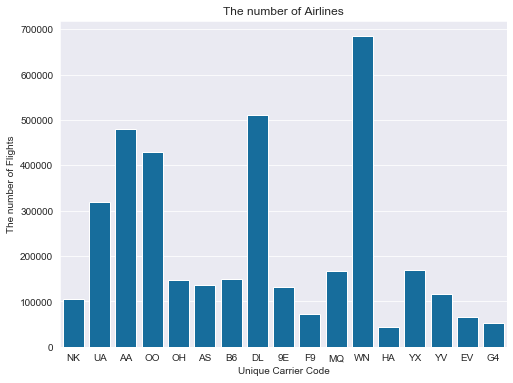

In [19]:
# I'll start by looking at the main variable of interest: OP_UNIQUE_CARRIER
plt.rcParams['figure.figsize'] = 8, 6
base_color = sb.color_palette('colorblind')[0]
sb.set_style('darkgrid')

sb.countplot(data = result_clean, x = 'OP_UNIQUE_CARRIER', color = base_color);
plt.xlabel('Unique Carrier Code');
plt.ylabel('The number of Flights');
plt.title('The number of Airlines');
result_clean.OP_UNIQUE_CARRIER.describe()

From the output, we could see WN(Southwest Airlines Co.) have most airlines, after is DL(Delta Air Lines Inc.), AA(American Airlines Inc.) and OO(Skywest Airlines Inc.)



### What's top 20 Busy of Origin Airport, and Top 20 Busy of Destination Airport? 

In [20]:
Busy_origin = result_clean.ORIGIN.value_counts()[:20]
Busy_origin

ATL    199825
ORD    175351
DFW    157777
DEN    133187
CLT    119798
LAX    111816
IAH     90500
SFO     87287
PHX     86578
LGA     85924
DTW     83780
LAS     83403
MSP     82569
BOS     77286
SEA     75975
MCO     70283
DCA     69077
EWR     68492
JFK     63462
PHL     61046
Name: ORIGIN, dtype: int64

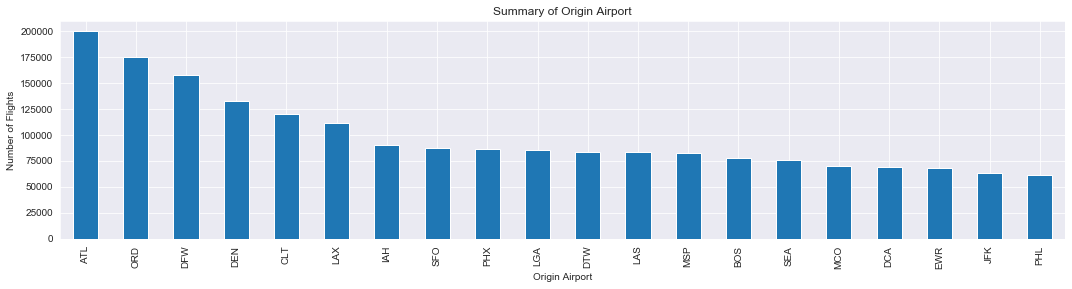

In [21]:
# Top 20 Busy of Origin Airport
plt.figure(figsize=[18,4])
Busy_origin.sort_values(ascending = False).plot(kind='bar')
plt.xlabel('Origin Airport')
plt.ylabel('Number of Flights')
plt.title("Summary of Origin Airport");

From the output, we could see the top 20 busy airports. 
There are 
- ATL(William B Hartsfield-Atlanta Intl) in Atlanta have 199825 flights depart
- ORD(Chicago O'Hare International) in Chicago have 175351 flights depart, 
- DFW(Dallas-Fort Worth International) in Dallas have 157777 flights depart
- DEN(Denver Intl) in Denver have 133187 flights depart
- CLT(Charlotte/Douglas International) in Charlotte have 119798 flights depart
- LAX(Los Angeles International) in Los Angeles have 111816 flights depart
- IAH(George Bush Intercontinental) in Houston have 90500 flights depart
- SFO(San Francisco International) in San Francisco have 87287 flights depart
- PHX(Phoenix Sky Harbor International) in Phoenix have 86578 flights depart
- LGA(LaGuardia) in NewYork have 85924 flights depart
- DTW(Detroit Metropolitan-Wayne County) in Detroit have 83780 flights depart
- LAS(McCarran International) in Las Vegas have 83403 flights depart
- MSP(Minneapolis-St Paul Intl) in Minneapolis have 82569 flights depart
- BOS(Gen Edw L Logan Intl) in Boston have 77286 flights depart
- SEA(Seattle-Tacoma Intl) in Seattle have 75975 flights depart
- MCO(Orlando International) in Orlando have 70283 flights depart
- DCA(Ronald Reagan Washington National) in Arlington have 69077 flights depart
- EWR(Newark Intl) in Newark have 68492 flights depart
- JFK(John F Kennedy Intl) in New York have 63462 flights depart
- PHL(Philadelphia Intl) in Philadelphia have 61046 flights depart

In [22]:
Busy_Destination = result_clean.DEST.value_counts()[:20]
Busy_Destination

ATL    199859
ORD    175274
DFW    157753
DEN    133124
CLT    119751
LAX    111825
IAH     90502
SFO     87374
PHX     86593
LGA     85917
DTW     83780
LAS     83392
MSP     82597
BOS     77288
SEA     75967
MCO     70261
DCA     69072
EWR     68490
JFK     63456
PHL     61016
Name: DEST, dtype: int64

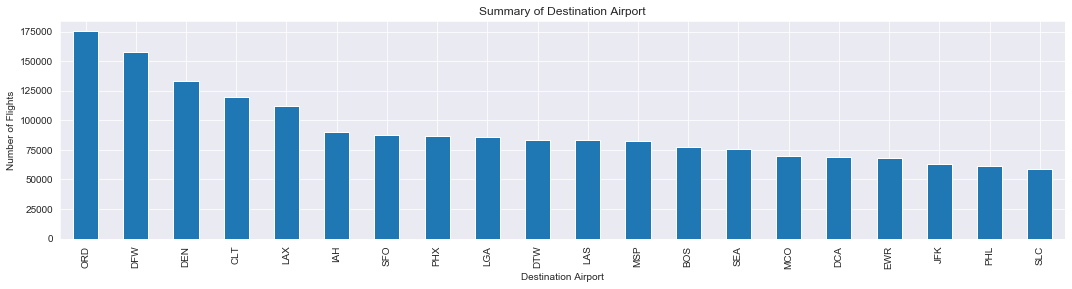

In [23]:
# Top 20 Busy of Destination Airport
plt.figure(figsize=[18,4])
result_clean.DEST.value_counts()[1:21].sort_values(ascending = False).plot(kind='bar')
plt.xlabel('Destination Airport')
plt.ylabel('Number of Flights')
plt.title("Summary of Destination Airport");

From the output, we could see the top 20 busy airports. 
There are 
- ATL(William B Hartsfield-Atlanta Intl) in Atlanta have 199859 flights arrive
- ORD(Chicago O'Hare International) in Chicago have 175274 flights arrive 
- DFW(Dallas-Fort Worth International) in Dallas have 157753 flights arrive
- DEN(Denver Intl) in Denver have 133124 flights arrive
- CLT(Charlotte/Douglas International) in Charlotte have 119751 flights arrive 
- LAX(Los Angeles International) in Los Angeles have 111825 flights arrive 
- IAH(George Bush Intercontinental) in Houston have 90502 flights arrive 
- SFO(San Francisco International) in San Francisco have 87374 flights arrive 
- PHX(Phoenix Sky Harbor International) in Phoenix have 86593 flights arrive 
- LGA(LaGuardia) in NewYork have 85917 flights depart
- DTW(Detroit Metropolitan-Wayne County) in Detroit have 83780 flights arrive 
- LAS(McCarran International) in Las Vegas have 83392 flights arrive 
- MSP(Minneapolis-St Paul Intl) in Minneapolis have 82597 flights arrive 
- BOS(Gen Edw L Logan Intl) in Boston have 77288 flights arrive 
- SEA(Seattle-Tacoma Intl) in Seattle have 75967 flights arrive 
- MCO(Orlando International) in Orlando have 70261 flights arrive 
- DCA(Ronald Reagan Washington National) in Arlington have 69072 flights arrive 
- EWR(Newark Intl) in Newark have 68490 flights arrive 
- JFK(John F Kennedy Intl) in New York have 63456 flights arrive 
- PHL(Philadelphia Intl) in Philadelphia have 61016 flights arrive 

The top 20 airports for depart and arrive are same

### What's the distribution of flights during weekdays ? 

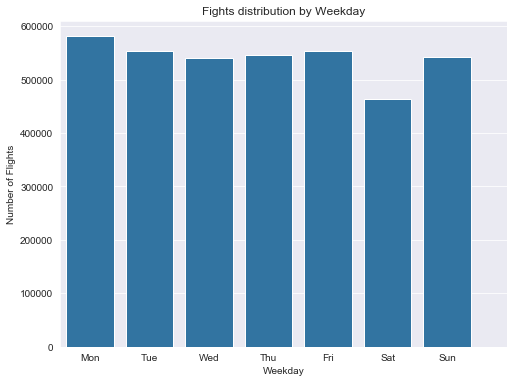

In [24]:
# Flights over weekdays
weekday = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
default_color = sb.color_palette()[0]
sb.countplot(data = result_clean, x= 'DAY_OF_WEEK',color = default_color)
plt.title('Fights distribution by Weekday')
plt.xticks(np.arange(0,7+1,1),weekday)
plt.xlabel('Weekday')
plt.ylabel('Number of Flights');


There is no big difference between the weekdays. There are most Flights on Monday and least flights on Saturday.

### What's the distribution of flights during months ?

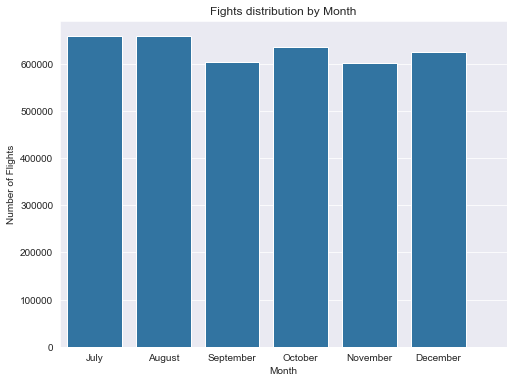

In [25]:
# Flights over Months
month = ['July','August','September','October','November','December']
default_color = sb.color_palette()[0]
sb.countplot(data = result_clean, x= 'MONTH',color = default_color)
plt.xticks(np.arange(0,6+1,1),month)
plt.title('Fights distribution by Month')
plt.xlabel('Month')
plt.ylabel('Number of Flights');



There is no big difference between months. However, we could see July and August have most flights. 

### What's the distribution of Flight time ? 

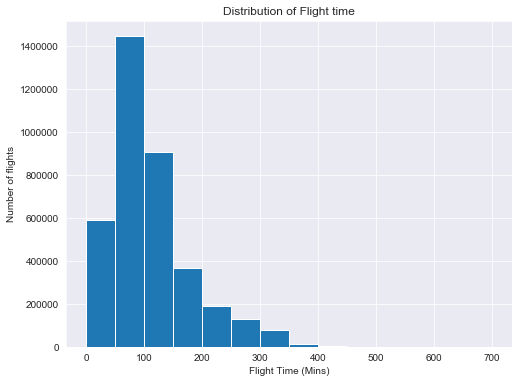

In [26]:
# Distribution of Distance between airports 
bins = np.arange(0, 750, 50)
plt.hist(data = result_clean, x='AIR_TIME', bins=bins);
plt.xlabel('Flight Time (Mins)');
plt.ylabel('Number of flights');
plt.title('Distribution of Flight time');

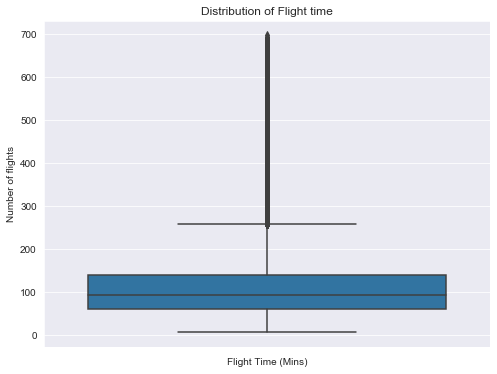

In [27]:
# Distribution of Flight time
sb.boxplot(data = result_clean, y = 'AIR_TIME');
plt.xlabel('Flight Time (Mins)');
plt.ylabel('Number of flights');
plt.title('Distribution of Flight time');

From the output, most flights' flight time are around 50 to 150 minutes. 

### What's the distribution of Distance between airports ? 

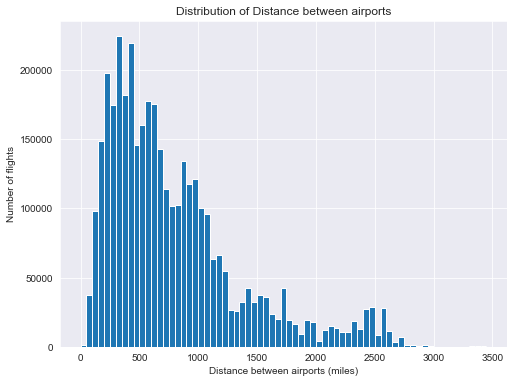

In [28]:
# Distribution of Distance between airports 
bins = np.arange(0, 3500, 50)
plt.hist(data = result_clean, x='DISTANCE', bins=bins);
plt.xlabel('Distance between airports (miles)');
plt.ylabel('Number of flights');
plt.title('Distribution of Distance between airports');

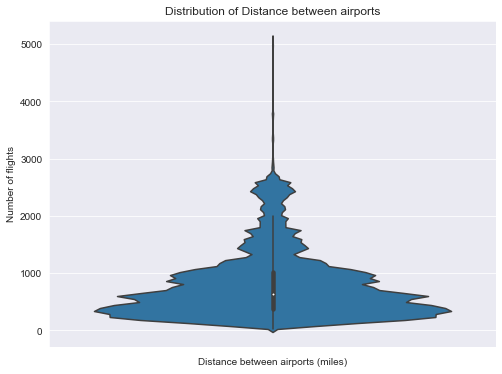

In [29]:
# Distribution of Distance between airports 
sb.violinplot(data = result_clean, y = 'DISTANCE');
plt.xlabel('Distance between airports (miles)');
plt.ylabel('Number of flights');
plt.title('Distribution of Distance between airports');

The data is not distributed evenly. There are many flights distance are around 600 miles. There are not that many flights distance above 1500 miles.
 

### What's the percentage of cancelled flight ? 

In [30]:
# Define a function to check whether the flight has been cancelled. 
def is_cancelled(x):
    return x > 0
result_clean['IS_CANCELLED'] = result_clean['CANCELLED'].apply(is_cancelled)

In [31]:
result_clean['IS_CANCELLED'] = result_clean['CANCELLED'].apply(lambda x: x > 0)

In [32]:
result_clean['CANCELLED'].value_counts()

0.0    3738046
1.0      44457
Name: CANCELLED, dtype: int64

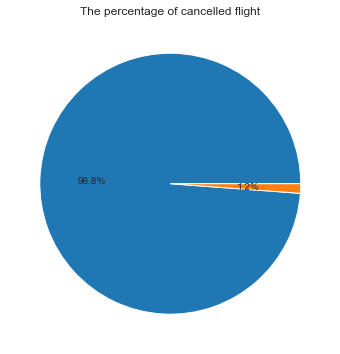

In [33]:
# The percentage of cancelled flight

plt.pie(result_clean.CANCELLED.value_counts(),autopct='%1.1f%%');

plt.title('The percentage of cancelled flight');

There are 44457 flights(1.2%) were cancelled. 

### What's the percentage of delayed flight? 

In [34]:
# Top 5 delayed flights information
result_clean.sort_values(by='ARR_DELAY', ascending=False)[:5]

,YEAR,MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,ORIGIN,DEST,DEP_TIME,DEP_DELAY,CRS_ARR_TIME,...,CANCELLATION_CODE,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,AIRTIME,IS_CANCELLED
879225,2019,12,4,OO,N727SK,SYR,ORD,12:21,2710.0,1632,...,NaN,107.0,607.0,2695.0,0.0,0.0,0.0,0.0,Within 2 hours,False
651138,2019,7,3,AA,N201UU,OGG,PHX,11:55,2315.0,606,...,NaN,328.0,2845.0,2315.0,0.0,35.0,0.0,0.0,4 - 6 hours,False
1950769,2019,10,3,YV,N955LR,SDF,DFW,20:31,2036.0,1156,...,NaN,109.0,733.0,24.0,0.0,0.0,0.0,2010.0,Within 2 hours,False
1481013,2019,11,2,G4,232NV,LEX,FLL,02:25,1979.0,1944,...,NaN,103.0,865.0,1966.0,0.0,0.0,0.0,0.0,Within 2 hours,False
2021802,2019,10,5,AA,N207UW,DCA,PHX,15:55,1964.0,920,...,NaN,258.0,1979.0,1933.0,0.0,0.0,0.0,0.0,4 - 6 hours,False


In [35]:
def is_delayed(x):
    return x > 0
result_clean['IS_DELAY'] = result_clean['ARR_DELAY'].apply(is_delayed)

In [36]:
result_clean['DELAYED'] = result_clean['ARR_DELAY'].apply(lambda x: x > 0)

In [37]:
result_clean['DELAYED'].value_counts()

False    2557320
True     1225183
Name: DELAYED, dtype: int64

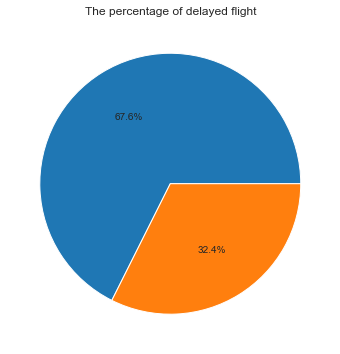

In [38]:
# The percentage of delayed flight

plt.pie(result_clean.DELAYED.value_counts(),autopct='%1.1f%%')
plt.title('The percentage of delayed flight');

There are 1225183 flights (32.4%) were delayed. 

### What's the percentage of each type of cause reason ? 

In [39]:
result_clean['CANCELLATION_CODE'].value_counts()

B    21482
C    11999
A    10968
D        8
Name: CANCELLATION_CODE, dtype: int64

In [40]:
result_clean['CANCELLATION_CODE'].notnull().sum()

44457

In [41]:
# Cause of CARRIER_DELAY
result_clean['CARRIER_DELAY'] = result_clean['CARRIER_DELAY'].apply(lambda x: x > 0)
result_clean['CARRIER_DELAY'].value_counts()

False    3457589
True      324914
Name: CARRIER_DELAY, dtype: int64

In [42]:
# Cause of 'WEATHER_DELAY'
result_clean['WEATHER_DELAY'] = result_clean['WEATHER_DELAY'].apply(lambda x: x > 0)
result_clean['WEATHER_DELAY'].value_counts()

False    3746516
True       35987
Name: WEATHER_DELAY, dtype: int64

In [43]:
# Cause of 'NAS_DELAY'
result_clean['NAS_DELAY'] = result_clean['NAS_DELAY'].apply(lambda x: x > 0)
result_clean['NAS_DELAY'].value_counts()

False    3427320
True      355183
Name: NAS_DELAY, dtype: int64

In [44]:
# Cause of 'LATE_AIRCRAFT_DELAY'
result_clean['LATE_AIRCRAFT_DELAY'] = result_clean['LATE_AIRCRAFT_DELAY'].apply(lambda x: x > 0)
result_clean['LATE_AIRCRAFT_DELAY'].value_counts()

False    3437850
True      344653
Name: LATE_AIRCRAFT_DELAY, dtype: int64

In [45]:
# Cause of 'SECURITY_DELAY'
result_clean['SECURITY_DELAY'] = result_clean['SECURITY_DELAY'].apply(lambda x: x > 0)
result_clean['SECURITY_DELAY'].value_counts()

False    3780319
True        2184
Name: SECURITY_DELAY, dtype: int64

In [46]:
Total_number_cause_of_delay = result_clean['CARRIER_DELAY'].value_counts()[1] + result_clean['WEATHER_DELAY'].value_counts()[1] + result_clean['NAS_DELAY'].value_counts()[1]
+ result_clean['LATE_AIRCRAFT_DELAY'].value_counts()[1] + result_clean['SECURITY_DELAY'].value_counts()[1]
CARRIER_DELAY = result_clean['CARRIER_DELAY'].value_counts()[1]/Total_number_cause_of_delay
WEATHER_DELAY = result_clean['WEATHER_DELAY'].value_counts()[1]/Total_number_cause_of_delay
NAS_DELAY = result_clean['NAS_DELAY'].value_counts()[1]/Total_number_cause_of_delay
LATE_AIRCRAFT_DELAY = result_clean['LATE_AIRCRAFT_DELAY'].value_counts()[1]/Total_number_cause_of_delay
SECURITY_DELAY = result_clean['SECURITY_DELAY'].value_counts()[1]/Total_number_cause_of_delay
print(Total_number_cause_of_delay)
Delay_reson = [CARRIER_DELAY, WEATHER_DELAY, NAS_DELAY,LATE_AIRCRAFT_DELAY,SECURITY_DELAY]
Delay_reson



716084


[0.45373727104641354,
 0.05025527731383469,
 0.49600745163975174,
 0.48130247289424144,
 0.003049921517587322]

Since there are some missing values in CANCELLATION CODE, so I will use cause of delay to count percentage of each type of cause reason


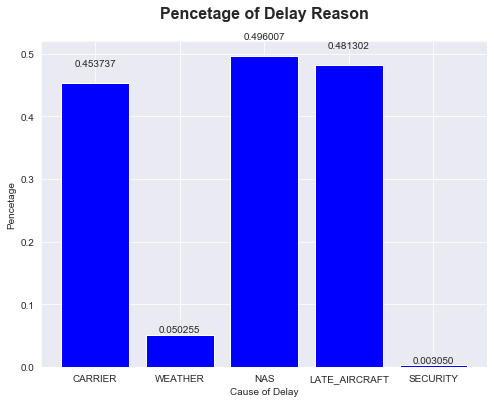

In [47]:
Delay_reson = [CARRIER_DELAY, WEATHER_DELAY, NAS_DELAY,LATE_AIRCRAFT_DELAY,SECURITY_DELAY]
cause_of_delay = ['CARRIER','WEATHER','NAS','LATE_AIRCRAFT','SECURITY']

Delay_reson_pos = [i for i, _ in enumerate(cause_of_delay)]

fig, ax = plt.subplots()
re = ax.bar(Delay_reson_pos, Delay_reson, color='b')

plt.xlabel("Cause of Delay")
plt.ylabel("Pencetage")
plt.title("Pencetage of Delay Reason", y = 1.05, fontsize = 16, fontweight = 'bold')
plt.xticks(Delay_reson_pos, cause_of_delay)

def autolabel(rects):

    for rect in re:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%f' % float(height),
        ha='center', va='bottom')
autolabel(re)
plt.show();

From the output, we could see that there are 324914 (45.37%) flights delayed due to carrier, there are 35987 (5.03%) flights delayed due to weather, 355183 (49.6%) flights delayed due to nas, 344653 (48.13%) flights delayed due to late aircraft, and 2184 (0.305%) flights due to security. 


### What are the size of  flight status ? 

In [48]:
# Creating flight status into dataframe
def flight_status(x):
    if x > 0:
        return 'Delayed'
    else:
        return 'Normal'

result_clean['Delayed'] = result_clean.DELAYED.apply(flight_status)  

In [49]:
def flight_status(x):
    if x > 0:
        return 'Cancelled'

result_clean['Cancelled'] = result_clean.IS_CANCELLED.apply(flight_status) 

In [50]:
conditions = [
    (result_clean['Delayed'] == "Delayed"),
    (result_clean['Cancelled'] == "Cancelled"),
    ]
choices = ['Delayed', 'Cancelled']
result_clean['flight_status'] = np.select(conditions, choices, default="Normal")

In [51]:
result_clean['flight_status'].value_counts()

Normal       2512863
Delayed      1225183
Cancelled      44457
Name: flight_status, dtype: int64

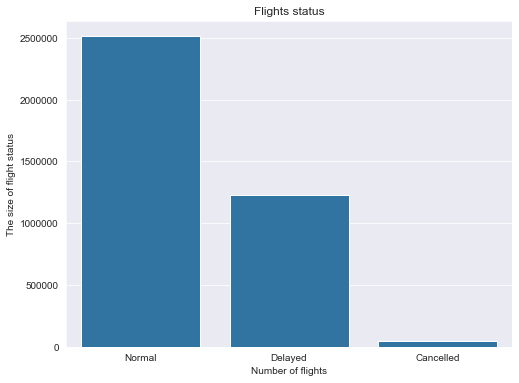

In [52]:
# Flights status
flight_status = ['Normal','Delayed','Cancelled']
default_color = sb.color_palette()[0]
sb.countplot(data = result_clean, x= 'flight_status',color = default_color)
plt.xticks(np.arange(0,2+1,1),flight_status)
plt.title('Flights status')
plt.xlabel('Number of flights')
plt.ylabel('The size of flight status');

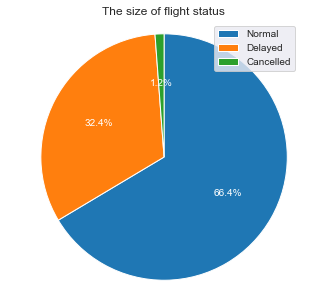

In [53]:
flight_status = result_clean['flight_status'].value_counts()
plt.figure(figsize = [12,5]);
plt.pie(flight_status, labels = flight_status.index, startangle = 90, autopct= '%1.1f%%', counterclock = False, textprops={'color':'white'})
plt.axis('square');
plt.legend()
plt.title('The size of flight status');

There are 2512863 (66.4%) flights can depart on time, 1225183 (32.4%) flights are delayed, 44457 (1.2%) flights are cancelled. 

### What's the Flight Time of US Flights ? 

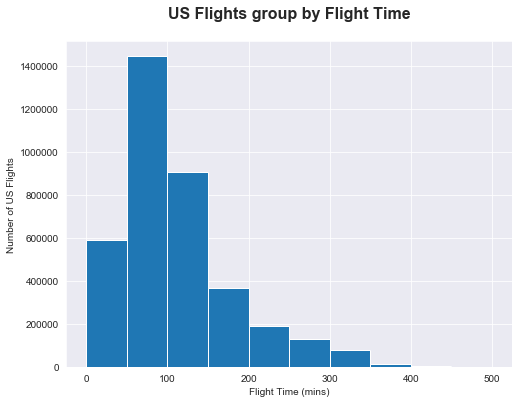

In [54]:
# Group by Flight Time data
bin_edges = np.arange(0, 550, 50)

plt.hist(data = result_clean, x = 'AIR_TIME', bins = bin_edges);
plt.title("US Flights group by Flight Time", y=1.05, fontsize=16, fontweight='bold')
plt.xlabel('Flight Time (mins)')
plt.ylabel('Number of US Flights');

From the output, we could see most airplanes' flights time are around 50 minutes to 150 minutes. 

### US Flights group by flight time

In [55]:
AIRTIME = result_clean['AIRTIME'].value_counts()
AIRTIME

Within 2 hours    2455437
2 - 4 hours       1019532
4 - 6 hours        242052
6 - 8 hours         10214
8 - 10 hours         1539
10 - 12 hours         430
Name: AIRTIME, dtype: int64

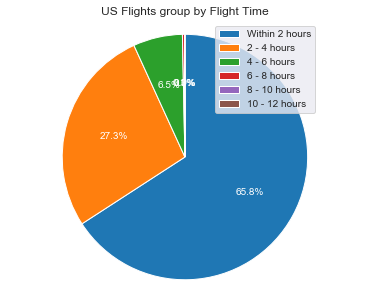

In [56]:
plt.figure(figsize = [12,5]);
plt.pie(AIRTIME, labels = AIRTIME.index, startangle = 90, autopct= '%1.1f%%', counterclock = False, textprops={'color':'white'})
plt.axis('square');
plt.legend()
plt.title('US Flights group by Flight Time');
 

From the output, we could see that most airplanes' flights time are within 2 hours are 65.8% of all flights, 27.3% airplanes' flights time are between 2 - 4 hours, 6.5% are within 6-8 hours. 

In [57]:
result_clean.head()

,YEAR,MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,ORIGIN,DEST,DEP_TIME,DEP_DELAY,CRS_ARR_TIME,...,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,AIRTIME,IS_CANCELLED,IS_DELAY,DELAYED,Delayed,Cancelled,flight_status
0,2019,7,4,NK,N602NK,SEA,IAH,00:37,-18.0,704,...,False,False,False,2 - 4 hours,False,False,False,Normal,None,Normal
1,2019,7,5,NK,N696NK,SEA,IAH,00:58,3.0,704,...,False,False,False,2 - 4 hours,False,True,True,Delayed,None,Delayed
2,2019,7,6,NK,N604NK,SEA,IAH,00:00,NaN,704,...,False,False,False,NaN,True,False,False,Normal,Cancelled,Cancelled
3,2019,7,7,NK,N632NK,SEA,IAH,01:32,37.0,704,...,True,False,False,2 - 4 hours,False,True,True,Delayed,None,Delayed
4,2019,7,1,NK,N649NK,SEA,IAH,00:50,-5.0,704,...,False,False,False,2 - 4 hours,False,False,False,Normal,None,Normal


### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

   - WN(Southwest Airlines Co.), DL(Delta Air Lines Inc.), AA(American Airlines Inc.) and OO(Skywest Airlines Inc.) have most airlines
   - The top 20 airports for depart and arrive are same, first five are ATL(William B Hartsfield-Atlanta Intl) ,ORD(Chicago O'Hare International), DFW(Dallas-Fort Worth International) , DEN(Denver Intl), CLT(Charlotte/Douglas International) 
   - There is no big difference of the number of flights between the weekdays.
   - There is no big difference of the number of flights between months.
   - Most flights' flight time are around 50 to 150 minutes.
   - Many flights distance are around 600 miles, there are not that many flights distance above 1500 miles.
   - There are 44457 flights(1.2%) were cancelled.
   - There are 1225183 flights (32.4%) were delayed.
   - There are 324914 (45.37%) flights delayed due to carrier, there are 35987 (5.03%) flights delayed due to weather, 355183 (49.6%) flights delayed due to nas, 344653 (48.13%) flights delayed due to late aircraft, and 2184 (0.305%) flights due to security.
   - There are 2512863 (66.4%) flights can depart on time, 1225183 (32.4%) flights are delayed, 44457 (1.2%) flights are cancelled.
   - Most airplanes' flights time are around 50 minutes to 150 minutes.
   - Most airplanes' flights time are within 2 hours are 65.8% of all flights, 27.3% airplanes' flights time are between 2 - 4 hours, 6.5% are within 6-8 hours.
   - None of the features were there any unusual
   - No transformation was needed

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

- The distribution of the Flight Time was a little surprising at first plotting out the original data. Most flights are within 2 hours. I divided Flight Time into six groups. In order to help focusing on the main cases of typical use of the system, I define flight status into three types Normal, Delayed and Cancelled.

<a id='Bivariate'></a>
## Bivariate Exploration

> In this section,  I will investigate relationships between pairs of variables in the
data. 

### What's flight status for each Company? 

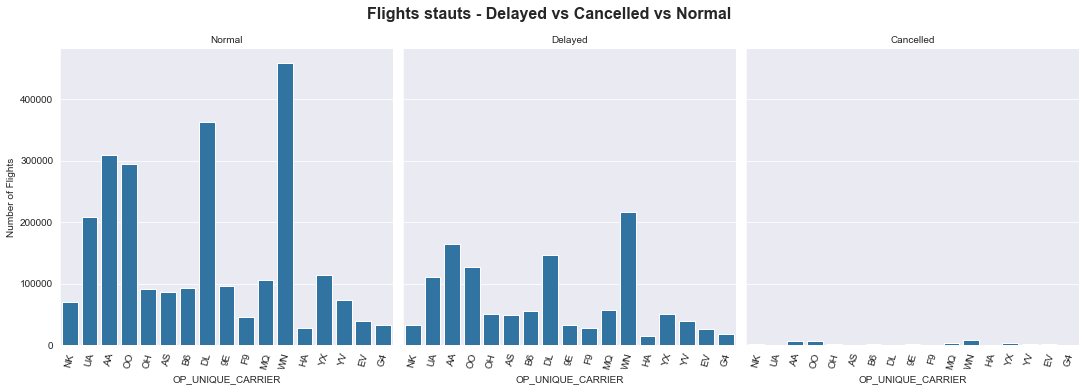

In [58]:
# Flights stauts for each carrier
graph = sb.catplot(data=result_clean, x='OP_UNIQUE_CARRIER', col="flight_status", kind='count', sharey = True, color = default_color);

graph.set_axis_labels("OP_UNIQUE_CARRIER", "Number of Flights");
graph.set_titles("{col_name}");

graph.fig.suptitle('Flights stauts - Delayed vs Cancelled vs Normal', y=1.05, fontsize=16, fontweight='bold');
graph.set_xticklabels(rotation=75);

The flights departed from WN have most number of flights are normal, Delayed and cancelled, next is DL,AA,OO and UA. That may beacuse these company carried the most airplanes. 


### What's the relationship between month and flight status? 

<Figure size 576x360 with 0 Axes>

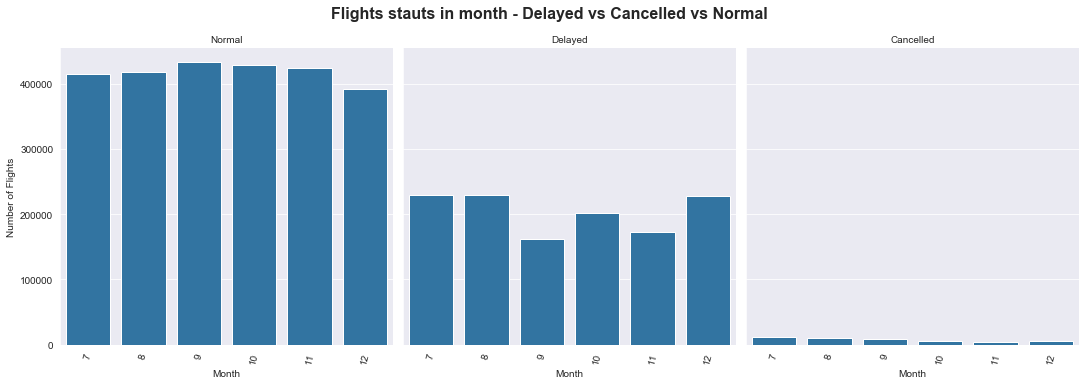

In [59]:
# Flights stauts in month - Delayed vs Cancelled vs Normal
plt.figure(figsize = [8, 5]);
graph = sb.catplot(data = result_clean, x = 'MONTH', col = "flight_status", kind = 'count', sharey = True, color = default_color);

graph.set_axis_labels("Month", "Number of Flights");
graph.set_titles("{col_name}");

graph.fig.suptitle('Flights stauts in month - Delayed vs Cancelled vs Normal', y = 1.05, fontsize=16, fontweight = 'bold');
graph.set_xticklabels(rotation = 75);


There is no big difference of flight depart on time between months.From last section, we know that July and August have most flights, and September has lowest flights, which is same as here in Delayed satus, September has lowerest delayed flights and highest on time flights. Due to the weather situation, the flights in December have similar delayed flights as July and August.However, the highest rate of flights cancelled in July and August, after is September,December and October. The least cancelled rate is in November.  

### What's the relationship between weekday and flight status? 

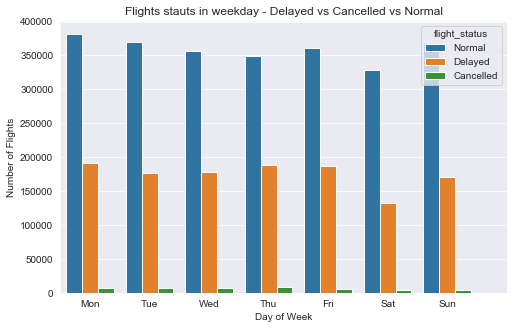

In [60]:
# Flights stauts in weekday - Delayed vs Cancelled vs Normal
plt.figure(figsize = [8, 5])
weekday = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
sb.countplot(data = result_clean, x='DAY_OF_WEEK', hue='flight_status');
plt.xticks(np.arange(0,7+1,1),weekday)
plt.title('Flights stauts in weekday - Delayed vs Cancelled vs Normal')
plt.xlabel('Day of Week');
plt.ylabel('Number of Flights');

There is no big difference of flight depart on time between weekdays.From last section, we know that There are most Flights on Monday and least flights on Saturday, which is same as here in Delayed satus. However, the highest cancelled rate of flights is on Thursday, and least is on Sunday. 



### What's the relationship between month and OP UNIQUE CARRIER? 

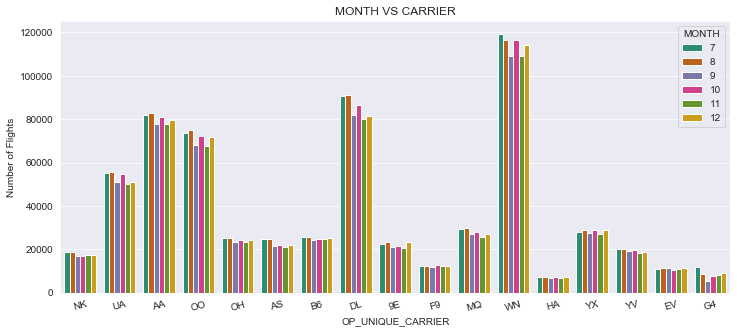

In [61]:
plt.figure(figsize = [12,5])
sb.countplot(data = result_clean,x = 'OP_UNIQUE_CARRIER',  hue = 'MONTH', color = default_color, palette="Dark2")
plt.xticks(rotation = 15)
plt.title('MONTH VS CARRIER')
plt.xlabel('OP_UNIQUE_CARRIER');
plt.ylabel('Number of Flights');

From the output, company WN have most flights in July, and least in September. Company DL have most flight in June and least in November. Company AA have most flights in June and least in September. Most company carry lowest flights in September. 

### What's the relationship between flight status and airtime?

<Figure size 576x360 with 0 Axes>

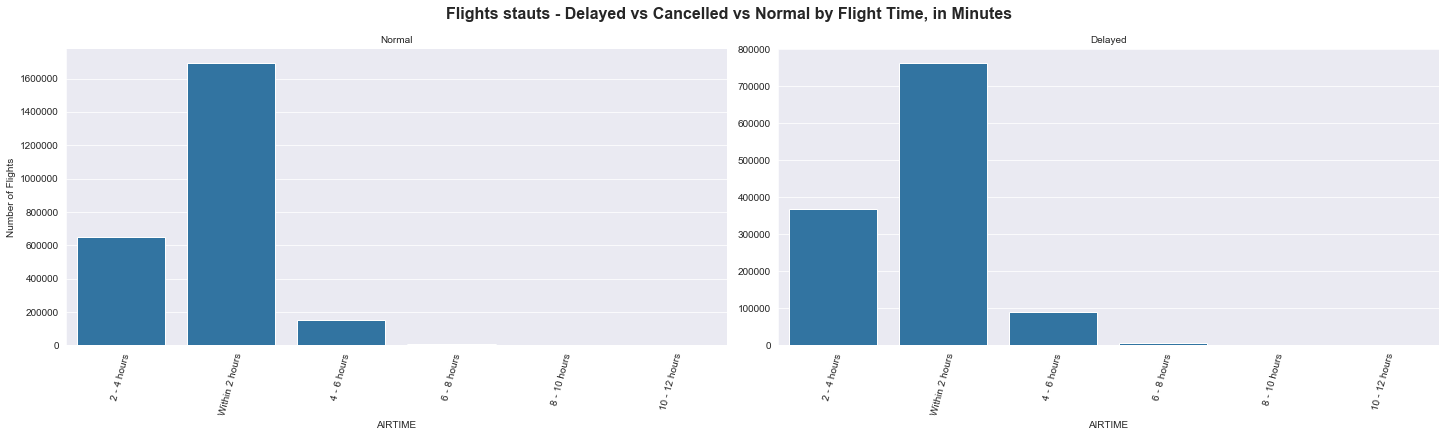

In [62]:
# Flights stauts - Delayed vs Normal by Flight Time, in Minutes 
plt.figure(figsize = [8, 5])
graph = sb.catplot(data = result_clean, x = 'AIRTIME', col='Delayed', kind = 'count', sharey = False, color = default_color, height = 5, aspect = 2);

graph.set_axis_labels('AIRTIME', 'Number of Flights');
graph.set_titles('{col_name}');

graph.fig.suptitle('Flights stauts - Delayed vs Cancelled vs Normal by Flight Time, in Minutes',y = 1.05, fontsize=16, fontweight = 'bold')
graph.set_xticklabels(rotation = 75);


The flights have flight time within 2 hours are more easier to be delayed. There are almost no flights will be delayed when the flight time over 6 hours.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

- WN (Southwest Airlines Co) have the highest on-time rate, also have highest Delayed rate and cancelled rate, next is DL,AA,OO and UA. That may because these company carried the most airplanes everyday. 

- There is no big difference of flight depart on time between months. Generally, the more flight in month, the delayed rate they have. However, the delayed rate in December are unusual. This might because of the weather, the low temperature might frozen the door of cabin. The cancelled rate have no relationship between the frequency of the flights, since the highest cancelled rate of flights are July and August, after is September,December and October. The least cancelled rate is in November. 

- There is no big difference of flight depart on time between weekdays. The more flight in each day of week, the delayed rate they have. There is no relationship between the number of flights each day of week and the cancelled rate. The highest cancelled rate of flights is on Thursday, and least is on Sunday.

- Company WN have most flights in July, and least in September. Company DL have most flight in June and least in November. Company AA have most flights in June and least in September. Most company carry lowest flights in September. 


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

- The flights have flight time within 2 hours are more easier to be delayed. There are almost no flights will be delayed when the flight time over 6 hours.

<a id='Multivariate'></a>
## Multivariate Exploration

In this section, I focused on the following two questions:
     - How does the flight vary weekdays during month for delayed and cancelled?
     - How does each carriers' flight status in each month? 

### How does the flight vary weekdays during month for delayed and cancelled?

<Figure size 576x432 with 0 Axes>

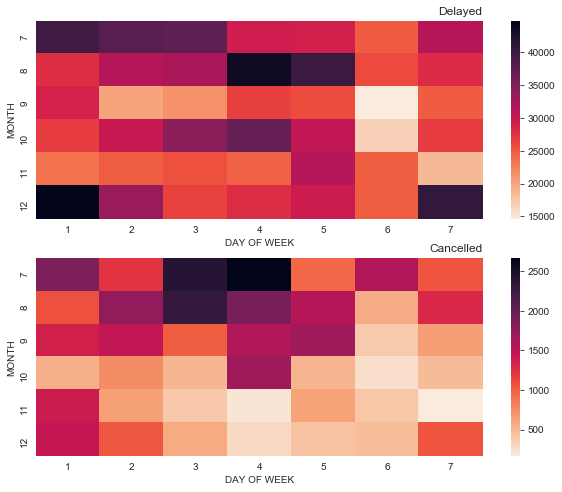

In [63]:
plt.suptitle('weekdays during month for Delayed and Cancelled')
plt.figure(figsize = [10, 8]);
plt.subplot(2, 1, 1)
Delayed = result_clean.query('flight_status == "Delayed"')
de = Delayed.groupby(['MONTH', 'DAY_OF_WEEK']).size()
de = de.reset_index(name='count')
de = de.pivot(index='MONTH', columns='DAY_OF_WEEK', values='count')
sb.heatmap(de, cmap='rocket_r');
plt.title('Delayed', loc='right');
plt.xlabel('DAY OF WEEK');
plt.ylabel('MONTH');

plt.subplot(2, 1, 2)
Cancelled = result_clean.query('flight_status == "Cancelled"')
ca = Cancelled.groupby(['MONTH', 'DAY_OF_WEEK']).size()
ca = ca.reset_index(name='count')
ca = ca.pivot(index='MONTH', columns='DAY_OF_WEEK', values='count')
sb.heatmap(ca, cmap='rocket_r');
plt.title('Cancelled', loc='right');
plt.xlabel('DAY OF WEEK');
plt.ylabel('MONTH');

The heatmaps shows clearly the different flights situation between the two type of flight status. Dealyed flights happened heavily in Monday of December and Thursday of June. The flight on Saturday of September have lowest number of delayed flights. Cancelled flights happened heavily on Thursday of July, and least flights cancelled on Thursday and Sunday of Noverber. There are more flights delayed in the June and July, which is same for cancelled flights. 

### How does each carriers' flight status in each month? 

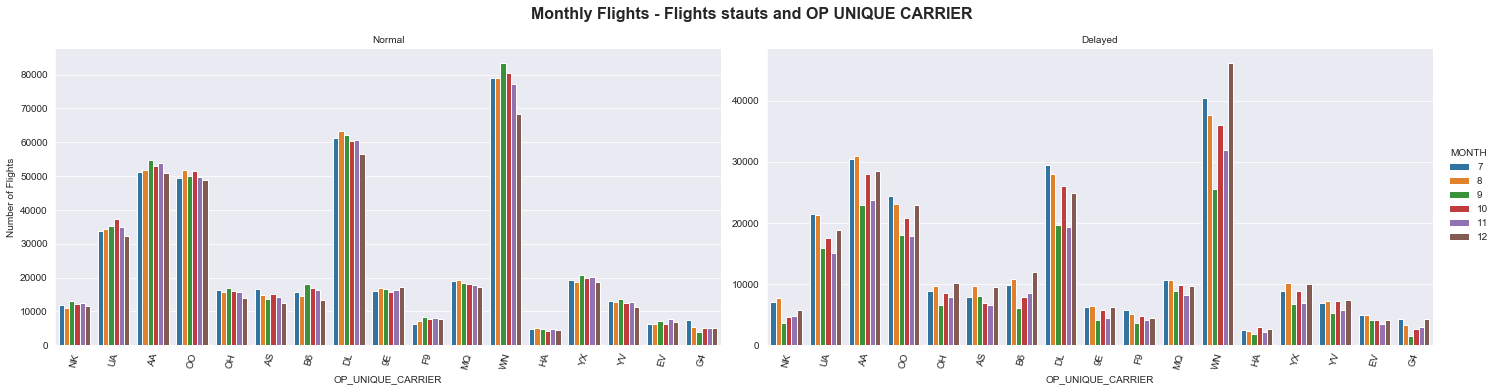

In [64]:
# Monthly Flights - Flights stauts and OP UNIQUE CARRIER

graph = sb.catplot(data = result_clean, x = 'OP_UNIQUE_CARRIER', col = 'Delayed', hue = "MONTH", kind = 'count', sharey = False, height = 5, aspect = 2);

graph.set_axis_labels("OP_UNIQUE_CARRIER", "Number of Flights")
graph._legend.set_title('MONTH')
graph.set_titles("{col_name}")

graph.fig.suptitle('Monthly Flights - Flights stauts and OP UNIQUE CARRIER', y=1.05, fontsize=16, fontweight='bold');
graph.set_xticklabels(rotation=75);

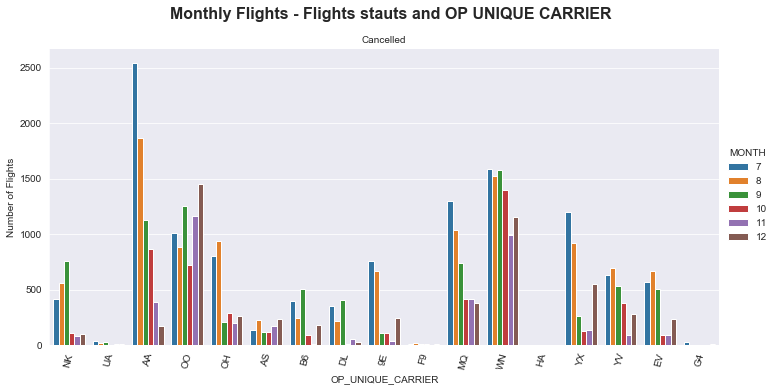

In [65]:
# Monthly Flights - Flights stauts and OP UNIQUE CARRIER

graph = sb.catplot(data = result_clean, x = 'OP_UNIQUE_CARRIER', col = 'Cancelled', hue = "MONTH", kind = 'count', sharey = False, height = 5, aspect = 2);

graph.set_axis_labels("OP_UNIQUE_CARRIER", "Number of Flights")
graph._legend.set_title('MONTH')
graph.set_titles("{col_name}")

graph.fig.suptitle('Monthly Flights - Flights stauts and OP UNIQUE CARRIER', y=1.05, fontsize=16, fontweight='bold');
graph.set_xticklabels(rotation=75);

Delayed flights happened heavily in WN (Southwest Airlines Co) in December and least number of delayed flights in September. Cancelled flights happened heavily in WN(Southwest Airlines Co) in June and least number of cancelled in November. Delayed flights happened heavily in AA(American Airlines Inc.) in June and least number of delayed flights in September. Cancelled flights happened heavily in AA(American Airlines Inc.) in June and least number of cancelled in December.  HA runs the fewest airlines and it has the least number of delayed flights and does not have cancelled flight. If people want to buy flight tickets from  Southwest Airlines Co, try to avoid buying June and December tickets. For American Airlines Inc, avoid buying the tickets for June, it has large probability that the flights would be cancelled. 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

- I extended my investigation of flight status in this section by looking at the impact of the carrier, week and month. The multivariate exploration of heatmaps shows clearly very different flights situation between the two type of flight status. Dealyed flights happened heavily in Monday of December and Thursday of June. The flight on Saturday of September have lowest number of delayed flights. Cancelled flights happened heavily on Thursday of July, and least flights cancelled on Thursday and Sunday of Noverber. There are more flights delayed in the June and July, which is same for cancelled flights.

- Delayed flights happened heavily in WN (Southwest Airlines Co) in December and least number of delayed flights in September. Cancelled flights happened heavily in WN(Southwest Airlines Co) in June and least number of cancelled in November. Delayed flights happened heavily in AA(American Airlines Inc.) in June and least number of delayed flights in September. Cancelled flights happened heavily in AA(American Airlines Inc.) in June and least number of cancelled in December. HA runs the fewest airlines and it has the least number of delayed flights and does not have cancelled flight. If people want to buy flight tickets from Southwest Airlines Co, try to avoid buying June and December tickets. For American Airlines Inc, avoid buying the tickets for June, it has large probability that the flights would be cancelled.

- The flight tickets in June, July and December have large probability to be cancelled or delayed than other months, however, people more prefer to travel beacuse of nice weather and hoilday. If you want to reduce the opportunities that flight cancelled or delayed, avoid buying the ticket on Monday of December, Thursday of June and Thursday of July. 


### Were there any interesting or surprising interactions between features?

> The interactions between features are all supplementing each other and make sense when looked at combined, there's no big surprise observed. From last section, we know that Company WN have most flights in July, and Company WN and July has highest delayed rate, which is rough description of the relationship between Month, Carrie and flight status.So nothing out of the expected here 

<a id='REF'></a>
## Reference

https://docs.google.com/document/d/e/2PACX-1vQmkX4iOT6Rcrin42vslquX2_wQCjIa_hbwD0xmxrERPSOJYDtpNc_3wwK_p9_KpOsfA6QVyEHdxxq7/pub?embedded=True

https://www.transtats.bts.gov/Fields.asp?Table_ID=236
    
https://stackoverflow.com/questions/58274401/importing-multiple-csv-files-into-pandas-and-merge-them-into-one-dataframe

https://stackoverflow.com/questions/43983622/remove-unnamed-columns-in-pandas-dataframe

https://stackoverflow.com/questions/47097447/convert-string-to-hhmm-time-in-python

https://datatofish.com/check-nan-pandas-dataframe/

https://mode.com/python-tutorial/pandas-groupby-and-python-lambda-functions/
    
https://mode.com/python-tutorial/defining-python-functions/

https://www.kite.com/python/answers/how-to-display-the-value-of-each-bar-in-a-bar-chart-using-matplotlib-in-python
    
https://stackoverflow.com/questions/19913659/pandas-conditional-creation-of-a-series-dataframe-column
    
    